In [23]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from load_model import clean_text, bert_clean_text, text_fit_tokenizer, LSTM, BILSTM, BERT, CheckWrongOrder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [24]:
import seaborn as sn
from sklearn.metrics import confusion_matrix


def show_confusion_matrix(y_test, y_pred, labels, model_name):
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)
#     print(cm)

    df_cm = pd.DataFrame(cm, index = [i for i in labels], columns = [i for i in labels])
    plt.figure(figsize = (12,7))

    cmap = sn.cm.rocket_r
    sn.heatmap(df_cm, annot=True, fmt=".0f", cmap = cmap)

    plt.title("Confusion Matrix - {}".format(model_name), fontsize = 30)
    plt.show()

In [25]:
def evaluate_model(model_name, X_test):
    labels = []
    y_test = list(data["checkpoint_status"])
    y_pred = []
    
    if model_name == "lstm":
        labels = ['COMPLETED', 'DELIVERED_GUARANTEE', 'IN_US', 'RETURN_TO_SENDER', 'TRACKING_AVAILABLE', 'TRACKING_ONLINE']
        model = lstm
    elif model_name == "bert":
        labels = ['COMPLETED', 'DELIVERED_GUARANTEE', 'IN_US', 'RETURN_TO_SENDER', 'TRACKING_AVAILABLE', 'TRACKING_ONLINE']
        model = bert
    elif model_name == "check_wrong_order":
        labels = [0, 1]
        y_test = list(data["wrong_order"])
        model = cwo
    
    for text in X_test:
        pred_detail, score = model.predict(text)
        y_pred.append(score)
        
    show_confusion_matrix(y_test, y_pred, labels, model_name)
    return y_test, y_pred        

In [26]:
lstm = LSTM()
bert = BERT()
cwo = CheckWrongOrder()

## Test

In [27]:
text = "  Shipment information received . SHENZHEN  Arrived at Sort Facility SHENZHEN . SHENZHEN  Departed Facility in SHENZHEN .   Departed Facility In processing center .   Arrive at international airport to abroad .   Departed from AIRPORT of Origin .   Arrived at AIRPORT of Destination，clearance in process .   Custom clearance completed .   Arrived at Sort Facility .   Departed from Facility .   delivery to local courier . NORTH LAS VEGAS,NV  Arrived Shipping Partner Facility, USPS Awaiting Item . NORTH LAS VEGAS,NV  Departed Shipping Partner Facility, USPS Awaiting Item . IRVING,TX  USPS in possession of item . IRVING,TX  Departed USPS Facility . SHREVEPORT LA DISTRIBUTION CENTER  Arrived at USPS Regional Facility . SHREVEPORT LA DISTRIBUTION CENTER  Accepted at USPS Regional Destination Facility . SHREVEPORT LA DISTRIBUTION CENTER  Departed USPS Regional Destination Facility .   In Transit to Next Facility . SHREVEPORT LA DISTRIBUTION CENTER  Departed USPS Regional Facility . ALEXANDRIA,LA  Arrived at USPS Facility . ALEXANDRIA,LA  Departed USPS Facility . WOODWORTH,LA  Arrived at USPS Facility . WOODWORTH,LA  Arrived at Post Office . WOODWORTH,LA  Out for Delivery, Expected Delivery by 9:00pm . WOODWORTH,LA  Delivered, In/At Mailbox . "
text

'  Shipment information received . SHENZHEN  Arrived at Sort Facility SHENZHEN . SHENZHEN  Departed Facility in SHENZHEN .   Departed Facility In processing center .   Arrive at international airport to abroad .   Departed from AIRPORT of Origin .   Arrived at AIRPORT of Destination，clearance in process .   Custom clearance completed .   Arrived at Sort Facility .   Departed from Facility .   delivery to local courier . NORTH LAS VEGAS,NV  Arrived Shipping Partner Facility, USPS Awaiting Item . NORTH LAS VEGAS,NV  Departed Shipping Partner Facility, USPS Awaiting Item . IRVING,TX  USPS in possession of item . IRVING,TX  Departed USPS Facility . SHREVEPORT LA DISTRIBUTION CENTER  Arrived at USPS Regional Facility . SHREVEPORT LA DISTRIBUTION CENTER  Accepted at USPS Regional Destination Facility . SHREVEPORT LA DISTRIBUTION CENTER  Departed USPS Regional Destination Facility .   In Transit to Next Facility . SHREVEPORT LA DISTRIBUTION CENTER  Departed USPS Regional Facility . ALEXANDRIA

In [28]:
lstm.predict(text)

(array([9.830e-01, 3.800e-04, 1.304e-02, 3.260e-03, 6.000e-05, 2.600e-04]),
 'COMPLETED')

In [29]:
bert.predict(text)

(array([ 4.86329, -0.24504, -1.23428, -1.89095, -1.06534, -1.9644 ]),
 'COMPLETED')

## Load data

In [31]:
root_path = "data/predict_status/test/"
file_list = ["test_set.xlsx"]

li = []
for file in file_list:
    df = pd.read_excel(root_path + file)
    li.append(df)
    
data = pd.concat(li, axis=0,ignore_index=True)
data['checkpoint_status'] = data['checkpoint_status'].astype(str)
data.tail()

,tracking_number,checkpoint_status,status_description
2300,YT2012521272090726,TRACKING_ONLINE,"Auburn, label created,manifest. SHANGHAI, Arri..."
2301,YT2012521272090726,TRACKING_ONLINE,"Auburn, label created,manifest. SHANGHAI, Arri..."
2302,YT2012521272090726,IN_US,"Auburn, label created,manifest. SHANGHAI, Arri..."
2303,YT2012521272090726,RETURN_TO_SENDER,"Auburn, label created,manifest. SHANGHAI, Arri..."
2304,YT2012521272090726,COMPLETED,"Auburn, label created,manifest. SHANGHAI, Arri..."


In [32]:
X_test = data["status_description"]
print(len(X_test))

2305


# LSTM

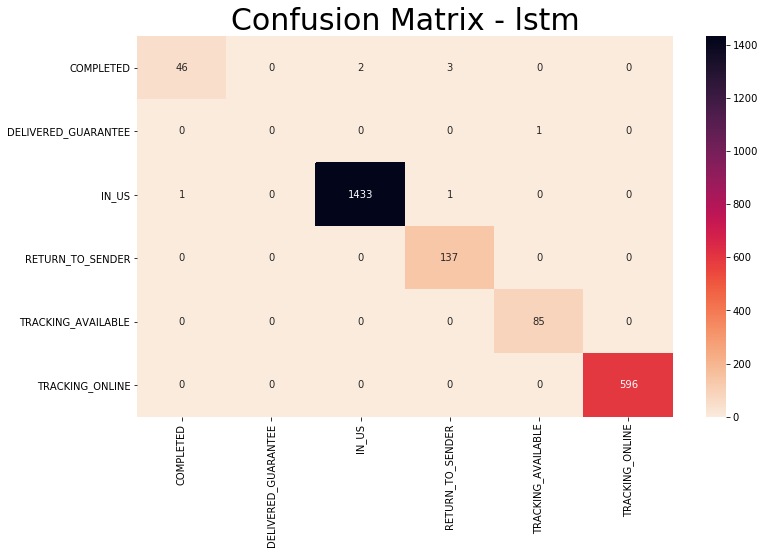

In [24]:
lstm_y_test, lstm_y_pred = evaluate_model("lstm", X_test)

In [25]:
print("LSTM accuracy on test set: {:0.5f}".format(accuracy_score(lstm_y_test, lstm_y_pred)))

LSTM accuracy on test set: 0.99653


In [26]:
count = 0
for i in range(len(lstm_y_test)):
    if lstm_y_test[i] != lstm_y_pred[i]:
        print("{} - {}: {}==>{}".format(i, data.iloc[i]["tracking_number"], lstm_y_pred[i], lstm_y_test[i]))
        count += 1

print()
print("Sum of miss prediction: {}".format(count))

0 - YT2108121236004588: TRACKING_AVAILABLE==>DELIVERED_GUARANTEE
459 - YT2103221236005484: IN_US==>COMPLETED
497 - YT2103021236007656: IN_US==>COMPLETED
1378 - YT2036421272131660: COMPLETED==>IN_US
1379 - YT2036421272131660: RETURN_TO_SENDER==>COMPLETED
2296 - YT2012521272090527: RETURN_TO_SENDER==>IN_US
2298 - YT2012521272090527: RETURN_TO_SENDER==>COMPLETED
2304 - YT2012521272090726: RETURN_TO_SENDER==>COMPLETED

Sum of miss prediction: 8


# BERT

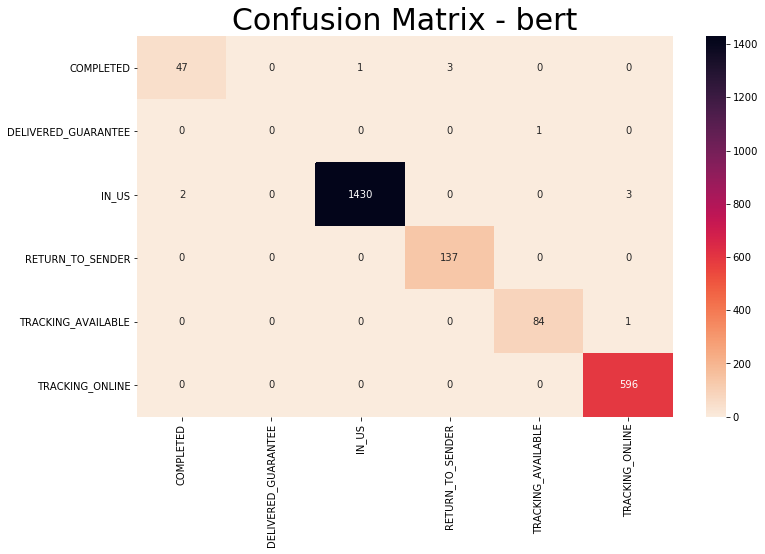

In [33]:
bert_y_test, bert_y_pred = evaluate_model("bert", X_test)

In [34]:
print("BERT accuracy on test set: {:0.5f}".format(accuracy_score(bert_y_test, bert_y_pred)))

BERT accuracy on test set: 0.99523


In [35]:
count = 0
for i in range(len(bert_y_test)):
    if bert_y_test[i] != bert_y_pred[i]:
        print("{} - {}: {}==>{}".format(i, data.iloc[i]["tracking_number"], bert_y_pred[i], bert_y_test[i]))
        count += 1
        
print()
print("Sum of miss prediction: {}".format(count))

0 - YT2108121236004588: TRACKING_AVAILABLE==>DELIVERED_GUARANTEE
151 - YT2107521236004606: COMPLETED==>IN_US
1108 - YT2101721236000427: RETURN_TO_SENDER==>COMPLETED
1179 - YT2101221272023695: TRACKING_ONLINE==>IN_US
1180 - YT2101221272023695: TRACKING_ONLINE==>IN_US
1181 - YT2101221272023695: TRACKING_ONLINE==>IN_US
1186 - YT2101221272023695: COMPLETED==>IN_US
1336 - YT2101621236003569: IN_US==>COMPLETED
1379 - YT2036421272131660: RETURN_TO_SENDER==>COMPLETED
1755 - YT2009021272094003: TRACKING_ONLINE==>TRACKING_AVAILABLE
2304 - YT2012521272090726: RETURN_TO_SENDER==>COMPLETED

Sum of miss prediction: 11


# Check Log

In [14]:
file_list = ["test_set.xlsx"]
root_path = "data/wrong_order/test/"

li = []
for file in file_list:
    df = pd.read_excel(root_path + file)
    li.append(df)
    
data = pd.concat(li, axis=0,ignore_index=True)
data['wrong_order'] = data['wrong_order'].astype(int)
data.tail()

,tracking_number,checkpoint_status,status_description,wrong_order
2300,YT2012521272090726,TRACKING_ONLINE,"Auburn, label created,manifest. SHANGHAI, Arri...",0
2301,YT2012521272090726,TRACKING_ONLINE,"Auburn, label created,manifest. SHANGHAI, Arri...",0
2302,YT2012521272090726,IN_US,"Auburn, label created,manifest. SHANGHAI, Arri...",0
2303,YT2012521272090726,RETURN_TO_SENDER,"Auburn, label created,manifest. SHANGHAI, Arri...",0
2304,YT2012521272090726,COMPLETED,"Auburn, label created,manifest. SHANGHAI, Arri...",0


In [15]:
X_test = data["status_description"]
print(len(X_test))

2305


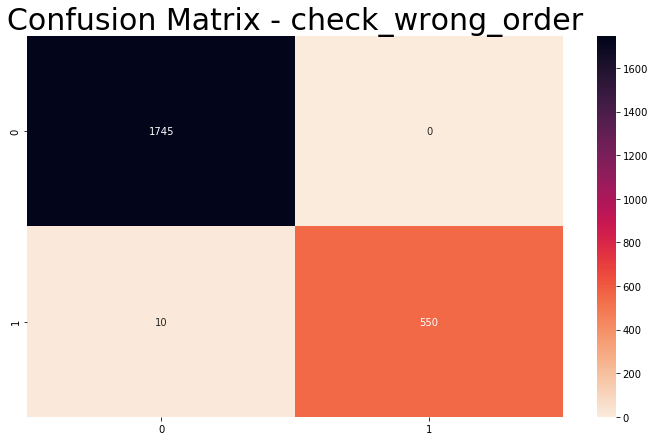

In [19]:
y_test, y_pred = evaluate_model("check_wrong_order", X_test)

In [20]:
print("check log accuracy on test set: {:0.5f}".format(accuracy_score(y_test, y_pred)))

check log accuracy on test set: 0.99566


In [21]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print("{} - {}: {}==>{}".format(i, data.iloc[i]["tracking_number"], y_pred[i], y_test[i]))
        print("\t{}".format(X_test[i]))
        count += 1

print()
print("Sum of miss prediction: {}".format(count))

77 - YT2107421272074093: 0==>1
	  Shipment information received . ZHENGZHOU  Arrived at Sort Facility ZHENGZHOU . SHENZHEN  Arrived at Sort Facility SHENZHEN . ZHENGZHOU  Departed from Facility ZHENGZHOU . ZHENGZHOU  Departed Facility in ZHENGZHOU . 
122 - YT2107421272142108: 0==>1
	  Shipment information received . ZHENGZHOU  Arrived at Sort Facility ZHENGZHOU . SHENZHEN  Arrived at Sort Facility SHENZHEN . HENA,ZHENGZHOU  The package has been collected by yunexpress . ZHENGZHOU  Departed from Facility ZHENGZHOU . ZHENGZHOU  Departed Facility in ZHENGZHOU . SHENZHEN  Arrived at Sort Facility SHENZHEN . 
654 - YT2103221272032772: 0==>1
	  shipment information received . ZHENGZHOU  departed facility in zhengzhou . ZHENGZHOU  departed from facility zhengzhou . SHENZHEN  arrived at sort facility shenzhen . ZHENGZHOU  arrived at sort facility zhengzhou . 
1053 - YT2101121272024315: 0==>1
	Whittier,CA  depart usps facility . Rancho Dominguez,CA 90605  hub scanned . JINJIANG  Departed Facili